# ダーツ投げのシミュレーションの作成

【問題1】ダーツのまとを選ぶ

In [19]:
import numpy as np

In [2]:
dice = [1, 2, 3, 4, 5, 6]
result = np.random.choice(dice)
print(result)

5


【問題2】ダーツを投げて、刺さった場所を記録する

In [51]:
mean = [result, 0]
cov = [[0.01, 0], [0, 0.01]]
x_y = np.random.multivariate_normal(mean, cov)
coordinates = [x_y[0], x_y[1]]
coordinates

[3.9297800112221544, -0.05659266239424115]

【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録す

In [52]:
from collections import defaultdict
hit_dict = defaultdict(list)
play_times = 1000

for _ in range(play_times):
    result = np.random.choice(dice)
    mean = [result, 0]
    cov = [[0.01, 0], [0, 0.01]]
    x_y = np.random.multivariate_normal(mean, cov)
    coordinates = [x_y[0], x_y[1]]
    hit_dict[result].append(coordinates)
    
print(hit_dict)

defaultdict(<class 'list'>, {5: [[5.0187682210705145, -0.03005168389255061], [5.111723371580223, -0.03344907746764004], [5.037978335398311, -0.07898123844978314], [4.926406679382164, 0.0855286889569481], [4.917839482353473, 0.0035914101055943247], [5.122136749682778, -0.14979675704869463], [5.041705720621394, 0.05259381497442377], [5.017660317803784, 0.01157264084361812], [4.973877425049565, -0.013092792206143575], [5.106931408717371, 0.038514489186004794], [5.006968971736385, -0.09467980023839968], [4.854611677854091, -0.18542433794607066], [5.149167545605962, -0.03155634966708992], [4.852260596087948, 0.018646968087701662], [5.034561167559083, -0.095681445405441], [4.9642166923767235, -0.09382108233845972], [5.0899922060837515, 0.08753622614613939], [4.9745488859066045, -0.14090308670891163], [5.005456877150336, -0.09333088036426937], [5.06603053388184, 0.030504083602053096], [5.09311464806945, -0.064260788377682], [4.970597816908709, 0.04248079184342174], [5.164679226249712, -0.0205

【問題4】ダーツのまとと刺さった位置を描画する

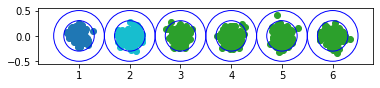

In [53]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import random
%matplotlib inline

fig, ax = plt.subplots()

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for key, list_value in hit_dict.items():
    outer_circle = patches.Circle(xy=(key, 0), radius=0.5, ec='b', fill=False)
    inner_circle = patches.Circle(xy=(key, 0), radius=0.3, ec='b', fill=False)
    ax.add_patch(outer_circle)
    ax.add_patch(inner_circle)

    color = random.choice(colors)
    for value in list_value:
        plt.scatter(value[0], value[1], c=color)

plt.axis('scaled')
ax.set_aspect('equal')

【問題5】関数化

In [56]:
def play_dart(play_times=1000, target=6):
    hit_dict = defaultdict(list)
    
    for _ in range(play_times):
        result = np.random.randint(1,target+1)
        mean = [result, 0]
        cov = [[0.01, 0], [0, 0.01]]
        x_y = np.random.multivariate_normal(mean, cov)
        coordinates = [x_y[0], x_y[1]]
        hit_dict[result].append(coordinates)
        
    fig, ax = plt.subplots()

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    for key, list_value in hit_dict.items():
        outer_circle = patches.Circle(xy=(key, 0), radius=0.5, ec='b', fill=False)
        inner_circle = patches.Circle(xy=(key, 0), radius=0.3, ec='b', fill=False)
        ax.add_patch(outer_circle)
        ax.add_patch(inner_circle)
    
        color = random.choice(colors)
        for value in list_value:
            plt.scatter(value[0], value[1], c=color)
    
    plt.axis('scaled')
    ax.set_aspect('equal')

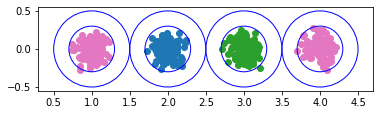

In [58]:
play_dart(play_times=500, target=4)